In [ ]:
# 클러스터링 관련 참조
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 라이브러리 기본 참조
from hossam import load_data
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from scipy.spatial import ConvexHull

# Elbow Point 계산 라이브러리
from kneed import KneeLocator

my_dpi = 200

c:\Users\wodyd\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


📦 아이티윌 이광호 강사가 제작한 라이브러리를 사용중입니다.
📚 자세한 사용 방법은 https://py.hossam.kr 을 참고하세요.
📧 Email: leekh4232@gmail.com
🎬 Youtube: https://www.youtube.com/@hossam-codingclub
📝 Blog: https://blog.hossam.kr/
🔖 Version: 0.4.6


In [2]:
origin = load_data('iris')
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
print(origin.info())
origin.head()

1936년 영국의 통계학자 로널드 피셔(Ronald A. Fisher)가 소개한 3가지 품종(setosa, versicolor, virginica)의 붓꽃(Iris)에 대한 꽃받침과 꽃잎의 길이와 너비 측정값으로 구성된 유명한 머신러닝 및 데이터 분석용 데이터셋.(출처: Kaggle)

field         description
------------  -------------
Sepal.Length  꽃밭침 길이
Sepal.Width   꽃밭침 너비
Petal.Length  꽃잎 길이
Petal.Width   꽃잎 너비
Species       품종

데이터셋 크기: (150, 5)
열 개수: 5
행 개수: 150
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df = origin.drop('Species', axis = 1)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 최적의 클러스터 수 구하기
### 1. 이니셔: K-Means의 성능평가지표
- 각 데이터가 자신의 군집 중심까지 떨어진 거리의 제곱합
- 군집 내부 응집도(군집 내부 압축 정도를 수치로 표현)


#### 1. 2~10까지 군집의 수를 늘려가면서 Inertia값 수집


In [4]:
klist = list(range(2, 11))

# intertia 값 저장할 리스트
inertia = []

for k in klist:
    estimator = KMeans(n_clusters = k, random_state = 0)
    estimator.fit(X=df)
    inertia.append(estimator.inertia_)

inertia

[152.3479517603579,
 78.8556658259773,
 57.22847321428571,
 49.82774055829229,
 42.42154575309748,
 34.420191786283894,
 30.064593073593077,
 28.715856536394465,
 27.46211879129643]

#### 2. Intertia 값의 변화 시각화

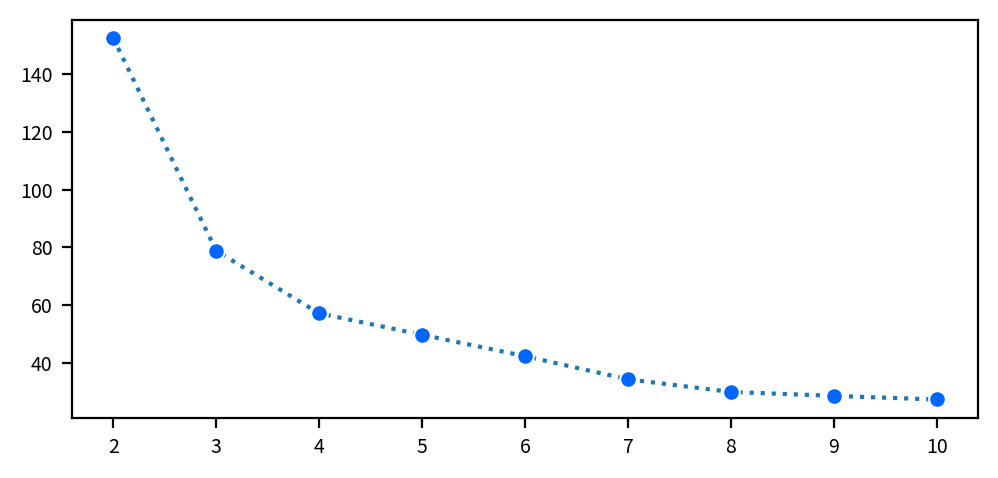

In [5]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(x= klist, y = inertia, linestyle = ':',
            marker = 'o', markerfacecolor = '#0066ff', markeredgecolor = '#ffffff')
# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김

# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

### 2. 엘보우 포인트
- k 증가에 따른 이너셔 감소 추세를 시각화하여 감소 폭이 완만으로 바뀌는 지점 --> 이 지점이 최적의 k값

#### 1. 엘보우 포인트 직접 구하기
- Numpy를 사용한 기울기(변화율) 계산

In [6]:
slope_list = [0]

for i in range(1, len(inertia)):
    x1 = klist[i - 1]
    y1 = inertia[i - 1]
    x2 = klist[i]
    y2 = inertia[i]

    slope, _ = np.polyfit([x1, x2], [y1, y2], 1)
    slope_list.append(slope)
slope_list

[0,
 np.float64(-73.49228593438053),
 np.float64(-21.62719261169158),
 np.float64(-7.4007326559934485),
 np.float64(-7.406194805194824),
 np.float64(-8.001353966813582),
 np.float64(-4.3555987126908065),
 np.float64(-1.3487365371986026),
 np.float64(-1.253737745098037)]

#### 기울기 평균

In [7]:
avg_slope = np.mean(slope_list)
avg_slope

np.float64(-13.876203663229045)

#### 기울기가 평균보다 작은 지점 찾기

In [8]:
ev = []
ei = []
for i, v in enumerate(slope_list):
    if v < avg_slope:
        ev.append(v)
        ei.append(i)

elbow_point = ei[np.argmax(ev)]
elbow_point

2

#### 최적의 군집수

In [9]:
best_k = klist[elbow_point]
best_k

4

#### Elbow Point를 포함한 Inertia 시각화

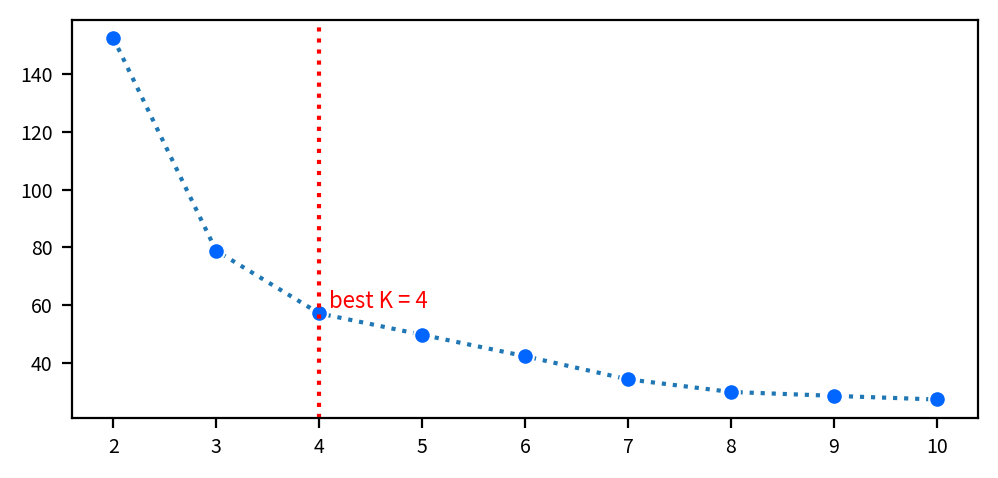

In [10]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(x= klist, y = inertia, linestyle = ':',
            marker = 'o', markerfacecolor = '#0066ff', markeredgecolor = '#ffffff')

# 엘보우 포인트 표시
ax.axvline(x=best_k, color = 'red', linestyle = ':')
ax.text(
    best_k + 0.1,
    inertia[elbow_point] + 0.1,
    "best K = %d" % best_k,
    fontsize = 8,
    ha = 'left',
    va = 'bottom',
    color = 'r'
)
# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김

# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

#### 엘보우 포인트 자동 구하기
- KneeLocator 활용

In [11]:
kl = KneeLocator(klist, inertia, curve = 'convex', direction = 'decreasing')
best_k = kl.elbow
best_y = kl.elbow_y
print('found elbow:', best_k)
print('found y:', best_y)

found elbow: 4
found y: 57.22847321428571


#### 클러스터링 시각화

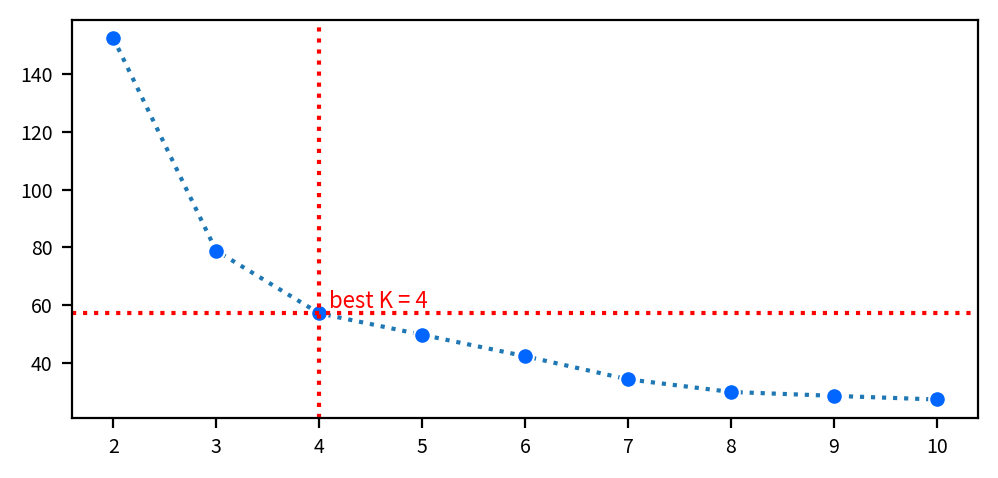

In [12]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(x= klist, y = inertia, linestyle = ':',
            marker = 'o', markerfacecolor = '#0066ff', markeredgecolor = '#ffffff')

# 엘보우 포인트 표시
ax.axvline(x=best_k, color = 'red', linestyle = ':')
ax.axhline(y=best_y, color = 'red', linestyle = ':')
ax.text(
    best_k + 0.1,
    inertia[elbow_point] + 0.1,
    "best K = %d" % best_k,
    fontsize = 8,
    ha = 'left',
    va = 'bottom',
    color = 'r'
)
# 그래프 꾸미기
ax.grid(True, alpha = 0.3) # 배경 격자 표시/숨김

# 출력
plt.grid()
plt.tight_layout()
plt.show()
plt.close()

#### 도출된 결과를 적용한 클러스터링

In [13]:
estimator = KMeans(n_clusters = best_k) 
estimator.fit(df)
cluster = estimator.predict(df)
df['ClusterID'] = cluster
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,ClusterID
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


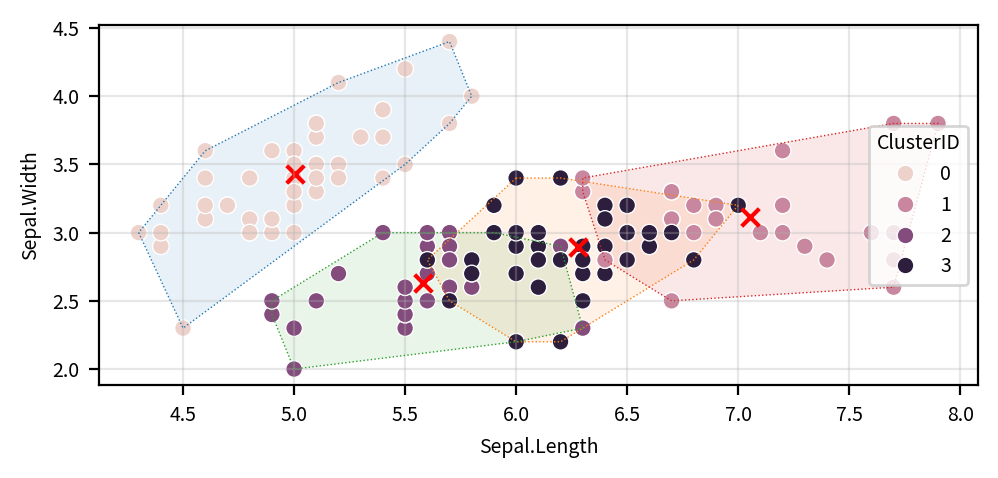

In [17]:
vdf = df.copy()
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 군집별 값의 종류별로 반복
for c in vdf['ClusterID'].unique():

    df_c = vdf.loc[vdf['ClusterID'] == c, ['Sepal.Length', 'Sepal.Width']]

    try:
        # 외각선 좌표 계산
        hull = ConvexHull(df_c)

        # 마지막 좌표 이후에 첫 번쨰 좌표를 연결
        points = np.append(hull.vertices, hull.vertices[0])

        ax.plot(# type: ignore
            df_c.iloc[points, 0], df_c.iloc[points, 1], linewidth = 0.5, linestyle = ':')
        ax.fill(df_c.iloc[points, 0], df_c.iloc[points, 1], alpha = 0.1)
    except:
        pass
# box 그리기
sb.scatterplot(data=vdf, x = 'Sepal.Length', y = 'Sepal.Width', hue = 'ClusterID')

ax.scatter(
    estimator.cluster_centers_[:, 0],
    estimator.cluster_centers_[:, 1],
    marker = 'x',
    c = 'red',
    alpha = 1,
    s = 40
)

# 그래프 꾸미기
ax.grid(True, alpha = 0.3) 
# 출력
plt.tight_layout()
plt.show()
plt.close()
